<img src=http://www.acofi.edu.co/eiei2016/wp-content/uploads/2016/09/Logo-Universidad-ICESI.jpg width="300" height="200" align="center">

#**<big><big>Algoritmo Y Programación III</big></big><br><small>Facultad de Ingeniería</small><br><small>_*Proyecto | parte 1*_**

# **Integrantes**
Juan David Acevedo - A00399081

Santiago Santacruz - A00378149

Esteban Cuellar - A00402548

### Instalar dependencias e importarlas

In [3]:
!python -V

# Limpieza y actualización base
!pip install -q --upgrade pip setuptools wheel

# Desinstala copias previas para evitar conflictos
!pip uninstall -y mediapipe protobuf numpy


!pip install -q numpy==1.26.4 protobuf==4.25.3 pyarrow pandas


Python 3.12.12
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 36.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
Found existing installation: protobuf 5.29.5
Uninstalling protobuf-5.29.5:
  Successfully uninstalled protobuf-5.29.5
Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.2

In [4]:
!pip install mediapipe

INFO: pip is looking at multiple versions of opencv-contrib-python to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 50.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 50.1 MB/s  0:00:01
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.12.0.88
    Uninstalling opencv-contrib-python-4.12.0.88:
      Successfully uninstalled opencv-contrib-python-4.12.0.88
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [mediapipe]


In [5]:
!pip uninstall opencv-python

Found existing installation: opencv-python 4.12.0.88
Uninstalling opencv-python-4.12.0.88:
  Would remove:
    /usr/local/lib/python3.12/dist-packages/cv2/*
    /usr/local/lib/python3.12/dist-packages/opencv_python-4.12.0.88.dist-info/*
    /usr/local/lib/python3.12/dist-packages/opencv_python.libs/libQt5Core-e7f476e2.so.5.15.16
    /usr/local/lib/python3.12/dist-packages/opencv_python.libs/libQt5Gui-3e966859.so.5.15.16
    /usr/local/lib/python3.12/dist-packages/opencv_python.libs/libQt5Test-9ac3ed15.so.5.15.16
    /usr/local/lib/python3.12/dist-packages/opencv_python.libs/libQt5Widgets-cd430389.so.5.15.16
    /usr/local/lib/python3.12/dist-packages/opencv_python.libs/libQt5XcbQpa-3cfa6167.so.5.15.16
    /usr/local/lib/python3.12/dist-packages/opencv_python.libs/libX11-xcb-0e257303.so.1.0.0
    /usr/local/lib/python3.12/dist-packages/opencv_python.libs/libXau-00ec42fe.so.6.0.0
    /usr/local/lib/python3.12/dist-packages/opencv_python.libs/libaom-49d00b71.so.3.12.1
    /usr/local/lib/p

In [6]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 51.7 MB/s  0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 55.4 MB/s  0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [opencv-python]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.21 requires numpy<2, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
ydf 0.13.0 requires protobuf<7.0.0,>=5.29.1, but you have protobuf 4.25.3 which is incompatible.


In [1]:
import os, math, json
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import pyarrow as pa, pyarrow.parquet as pq
import matplotlib.pyplot as plt
import glob

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose


### Montar drive

In [2]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


### Configurar carpetas de acceso a drive

In [3]:
DRIVE_VIDEOS = "/content/drive/.shortcut-targets-by-id/1FaYueZhUWw_YKYWeT8A9WdoOnLNHlD9q/proyecto/videos"   # aquí van los .mp4/.avi para la muestra
DRIVE_POSES  = "/content/drive/.shortcut-targets-by-id/1FaYueZhUWw_YKYWeT8A9WdoOnLNHlD9q/proyecto/poses"    # aquí se guardarán .parquet y resumen

os.makedirs(DRIVE_VIDEOS, exist_ok=True)
os.makedirs(DRIVE_POSES,  exist_ok=True)

###Recolectar los videos a procesar

In [4]:
VIDEO_EXTS = ("*.mp4","*.avi","*.mov","*.mkv","*.wmv","*.flv")
video_paths = []
for ext in VIDEO_EXTS:
    video_paths += glob.glob(os.path.join(DRIVE_VIDEOS, ext))
video_paths = sorted(video_paths)

print(f"🎬 Videos encontrados: {len(video_paths)}")
for p in video_paths[:5]:
    print("  -", os.path.basename(p))
if not video_paths:
    print("No hay videos en", DRIVE_VIDEOS)


🎬 Videos encontrados: 21
  - Walk_back.mp4
  - sit_front (1).mp4
  - sit_front (2).mp4
  - sit_front.mp4
  - sit_side (1).mp4


### Detección (SMOKE TESTS)

Muestra 1 frame de los primeros N videos ajustados en la variable N_SMOKE

 Sin detección en frame inicial: Walk_back.mp4


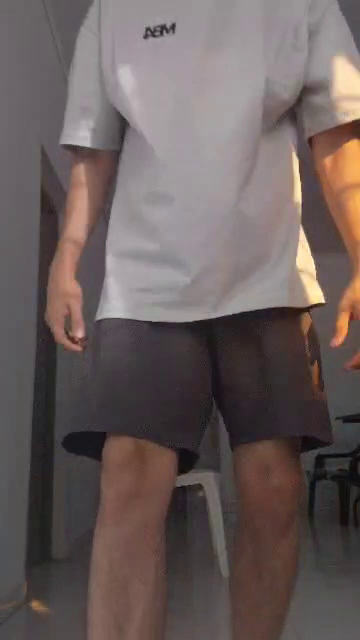

In [5]:
from google.colab.patches import cv2_imshow

N_SMOKE = 1  # cambia2 a 2-3 si se quieren ver más

for i, vp in enumerate(video_paths[:N_SMOKE]):
    cap = cv2.VideoCapture(vp)
    ok, frame = cap.read()
    cap.release()
    if not ok:
        print(f" No pude leer: {os.path.basename(vp)}"); continue

    with mp_pose.Pose(min_detection_confidence=0.5,
                      min_tracking_confidence=0.5) as pose:
        rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        res = pose.process(rgb)
        bgr = frame.copy()
        if res.pose_landmarks:
            mp_drawing.draw_landmarks(bgr, res.pose_landmarks, mp_pose.POSE_CONNECTIONS)
            print(f" Smoke test OK en: {os.path.basename(vp)}")
        else:
            print(f" Sin detección en frame inicial: {os.path.basename(vp)}")
        cv2_imshow(bgr)


### Guardar landmarks por frame

In [6]:
import math
import numpy as np
import pyarrow as pa, pyarrow.parquet as pq
import mediapipe as mp, cv2

def extract_video_to_parquet(in_video: str, out_parquet: str,
                             stride: int = 1,
                             model_complexity: int = 1,
                             min_det: float = 0.5,
                             min_trk: float = 0.5) -> dict:

    mp_pose = mp.solutions.pose
    cap = cv2.VideoCapture(in_video)
    fps = cap.get(cv2.CAP_PROP_FPS) or 24.0
    if fps == 0 or math.isclose(fps, 0.0):
        fps = 24.0
    W = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    H = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    rows = []
    f = -1
    miss = 0
    LM = 33

    with mp_pose.Pose(model_complexity=model_complexity,
                      min_detection_confidence=min_det,
                      min_tracking_confidence=min_trk,
                      smooth_landmarks=True) as pose:

        while True:
            ok, frame = cap.read()
            if not ok:
                break
            f += 1
            if f % stride != 0:
                continue

            t = f / fps
            rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            rgb.flags.writeable = False
            res = pose.process(rgb)

            x = np.full(LM, np.nan, np.float32)
            y = np.full(LM, np.nan, np.float32)
            v = np.zeros(LM, np.float32)

            if res.pose_landmarks:
                for i, lm in enumerate(res.pose_landmarks.landmark[:LM]):
                    x[i], y[i], v[i] = lm.x * W, lm.y * H, getattr(lm, "visibility", 0.0)
            else:
                miss += 1

            row = {"frame_idx": f, "t_sec": float(t), "width": W, "height": H, "fps": float(fps)}
            for i in range(LM):
                row[f"x_{i}"] = float(x[i])
                row[f"y_{i}"] = float(y[i])
                row[f"vis_{i}"] = float(v[i])
            rows.append(row)

    cap.release()
    pq.write_table(pa.Table.from_pylist(rows), out_parquet)

    return {
        "video": os.path.basename(in_video),
        "parquet": os.path.basename(out_parquet),
        "frames": len(rows),
        "miss_frames": miss,
        "fps": float(fps),
        "width": int(W),
        "height": int(H),
        "stride": int(stride),
        "model_complexity": int(model_complexity),
        "min_det": float(min_det),
        "min_trk": float(min_trk),
    }


### Procesar los videos y guardar un resumen en CSV

In [8]:
import pandas as pd

summaries = []

if not video_paths:
    print(" No hay videos para procesar. Añade archivos a:", DRIVE_VIDEOS)
else:
    for vp in video_paths:
        base = os.path.splitext(os.path.basename(vp))[0]
        out_parquet = os.path.join(DRIVE_POSES, f"{base}.parquet")
        print(f" Procesando {os.path.basename(vp)} ...")
        info = extract_video_to_parquet(vp, out_parquet,
                                        stride=1,
                                        model_complexity=1,
                                        min_det=0.5, min_trk=0.5)
        summaries.append(info)
        print(f" Guardado: {os.path.basename(out_parquet)} | frames:{info['frames']} | miss:{info['miss_frames']}")

    # Guardar resumen
    summary_df = pd.DataFrame(summaries)
    summary_csv = os.path.join(DRIVE_POSES, "poses_summary.csv")
    summary_df.to_csv(summary_csv, index=False)
    print("\n Resumen guardado en:", summary_csv)

summary_df.head() if len(summaries) else None


 Procesando Walk_back.mp4 ...
 Guardado: Walk_back.parquet | frames:138 | miss:6
 Procesando sit_front (1).mp4 ...
 Guardado: sit_front (1).parquet | frames:79 | miss:0
 Procesando sit_front (2).mp4 ...
 Guardado: sit_front (2).parquet | frames:94 | miss:0
 Procesando sit_front.mp4 ...
 Guardado: sit_front.parquet | frames:97 | miss:0
 Procesando sit_side (1).mp4 ...
 Guardado: sit_side (1).parquet | frames:65 | miss:0
 Procesando sit_side (2).mp4 ...
 Guardado: sit_side (2).parquet | frames:121 | miss:0
 Procesando sit_side.mp4 ...
 Guardado: sit_side.parquet | frames:84 | miss:0
 Procesando stand_front (1).mp4 ...
 Guardado: stand_front (1).parquet | frames:73 | miss:0
 Procesando stand_front (2).mp4 ...
 Guardado: stand_front (2).parquet | frames:207 | miss:0
 Procesando stand_front.mp4 ...
 Guardado: stand_front.parquet | frames:61 | miss:0
 Procesando stand_side (1).mp4 ...
 Guardado: stand_side (1).parquet | frames:134 | miss:0
 Procesando stand_side.mp4 ...
 Guardado: stand_side

,video,parquet,frames,miss_frames,fps,width,height,stride,model_complexity,min_det,min_trk
0,Walk_back.mp4,Walk_back.parquet,138,6,29.671518,360,640,1,1,0.5,0.5
1,sit_front (1).mp4,sit_front (1).parquet,79,0,30.000000,720,1280,1,1,0.5,0.5
2,sit_front (2).mp4,sit_front (2).parquet,94,0,30.182820,360,640,1,1,0.5,0.5
3,sit_front.mp4,sit_front.parquet,97,0,30.000000,480,864,1,1,0.5,0.5
4,sit_side (1).mp4,sit_side (1).parquet,65,0,30.000000,720,1280,1,1,0.5,0.5


In [9]:
display(summary_df)

,video,parquet,frames,miss_frames,fps,width,height,stride,model_complexity,min_det,min_trk
0,Walk_back.mp4,Walk_back.parquet,138,6,29.671518,360,640,1,1,0.5,0.5
1,sit_front (1).mp4,sit_front (1).parquet,79,0,30.000000,720,1280,1,1,0.5,0.5
2,sit_front (2).mp4,sit_front (2).parquet,94,0,30.182820,360,640,1,1,0.5,0.5
3,sit_front.mp4,sit_front.parquet,97,0,30.000000,480,864,1,1,0.5,0.5
4,sit_side (1).mp4,sit_side (1).parquet,65,0,30.000000,720,1280,1,1,0.5,0.5
5,sit_side (2).mp4,sit_side (2).parquet,121,0,29.564423,360,640,1,1,0.5,0.5
6,sit_side.mp4,sit_side.parquet,84,0,30.000000,480,864,1,1,0.5,0.5
7,stand_front (1).mp4,stand_front (1).parquet,73,0,30.000000,480,864,1,1,0.5,0.5
8,stand_front (2).mp4,stand_front (2).parquet,207,0,29.935055,360,640,1,1,0.5,0.5
9,stand_front.mp4,stand_front.parquet,61,0,30.000000,720,1280,1,1,0.5,0.5


### Abrir un parquet generado

In [10]:
# Carga el primero que se haya creado y mira columnas/filas
generated_parquets = sorted(glob.glob(os.path.join(DRIVE_POSES, "*.parquet")))
print("Parquet generados:", len(generated_parquets))
if generated_parquets:
    test_pq = generated_parquets[0]
    print("Mostrando:", os.path.basename(test_pq))
    df = pd.read_parquet(test_pq)
    display(df.head())
    print(df.shape)


Parquet generados: 42
Mostrando: Walk_back (1).parquet


,frame_idx,t_sec,width,height,fps,x_0,y_0,vis_0,x_1,y_1,...,vis_29,x_30,y_30,vis_30,x_31,y_31,vis_31,x_32,y_32,vis_32
0,0,0.000000,360,640,29.671518,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
1,1,0.033702,360,640,29.671518,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
2,2,0.067405,360,640,29.671518,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
3,3,0.101107,360,640,29.671518,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
4,4,0.134809,360,640,29.671518,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0


(138, 104)


Se observan valores NAN o Con 0s porque los primeros frames no tienen detección, para verificar que si se estan tomando frames validos, realizamos una consulta de un parquet

###Consulta de frames validos

In [11]:
pq_path = "/content/drive/.shortcut-targets-by-id/1FaYueZhUWw_YKYWeT8A9WdoOnLNHlD9q/proyecto/poses/Walk_back.parquet"
df = pd.read_parquet(pq_path)

LM = 33
# fila del primer frame con detección (cualquier landmark no-NaN)
mask_has_pose = ~df[[f"x_{i}" for i in range(LM)]].isna().all(axis=1)
first_ok_idx = mask_has_pose.idxmax() if mask_has_pose.any() else None

print("shape:", df.shape)
print("frames con al menos 1 landmark:", int(mask_has_pose.sum()), "/", len(df))
print("primer frame OK:", first_ok_idx)


if first_ok_idx is not None:
    display(df.loc[max(0, first_ok_idx-2): first_ok_idx+2, ["frame_idx","t_sec","x_11","y_11","vis_11","x_23","y_23","vis_23"]])


shape: (138, 104)
frames con al menos 1 landmark: 132 / 138
primer frame OK: 6


,frame_idx,t_sec,x_11,y_11,vis_11,x_23,y_23,vis_23
4,4,0.134809,NaN,NaN,0.000000,NaN,NaN,0.000000
5,5,0.168512,NaN,NaN,0.000000,NaN,NaN,0.000000
6,6,0.202214,213.671448,65.770020,0.999830,229.641708,293.516785,0.995736
7,7,0.235916,291.268555,59.926559,0.999815,242.012207,284.436493,0.995351
8,8,0.269619,298.269257,60.120159,0.999801,247.816483,284.035400,0.995296


### Carga un parquet específico

In [14]:

pq_path = os.path.join(DRIVE_POSES, "Walk_back.parquet")  # cambia por el que quieras
df = pd.read_parquet(pq_path)

# columnas esperadas
cols_x = [f"x_{i}" for i in range(LM)]
cols_y = [f"y_{i}" for i in range(LM)]
cols_v = [f"vis_{i}" for i in range(LM) if f"vis_{i}" in df.columns]  # por si no están

print("shape:", df.shape)
print("Tiene columnas x_i?", set(cols_x).issubset(df.columns))
print("Tiene columnas y_i?", set(cols_y).issubset(df.columns))
print("Tiene columnas vis_i?", len(cols_v)==LM)

mask_has_pose = ~df[cols_x].isna().all(axis=1)
first_ok_idx = mask_has_pose.idxmax() if mask_has_pose.any() else None
print("frames con al menos 1 landmark:", int(mask_has_pose.sum()), "/", len(df))
print("primer frame OK:", first_ok_idx)

if first_ok_idx is not None:
    display(df.loc[max(0, first_ok_idx-2): first_ok_idx+2,
                   ["frame_idx","t_sec","x_11","y_11","vis_11","x_23","y_23","vis_23"]])


shape: (138, 104)
Tiene columnas x_i? True
Tiene columnas y_i? True
Tiene columnas vis_i? True
frames con al menos 1 landmark: 132 / 138
primer frame OK: 6


,frame_idx,t_sec,x_11,y_11,vis_11,x_23,y_23,vis_23
4,4,0.134809,NaN,NaN,0.000000,NaN,NaN,0.000000
5,5,0.168512,NaN,NaN,0.000000,NaN,NaN,0.000000
6,6,0.202214,213.671448,65.770020,0.999830,229.641708,293.516785,0.995736
7,7,0.235916,291.268555,59.926559,0.999815,242.012207,284.436493,0.995351
8,8,0.269619,298.269257,60.120159,0.999801,247.816483,284.035400,0.995296


### Landmarks visibles por frame

In [15]:
VIS_THR = 0.5 if len(cols_v)==LM else None

if VIS_THR is not None:
    vis_mat = df[cols_v].fillna(0).values >= VIS_THR
    visible_count = vis_mat.sum(axis=1)
else:
    # Si no hay visibilidad, al menos cuenta no-NaN en X como proxy
    visible_count = (~df[cols_x].isna()).sum(axis=1)

df["visible_landmarks"] = visible_count
print(df["visible_landmarks"].describe())


count    138.000000
mean      29.347826
std        6.717069
min        0.000000
25%       28.000000
50%       31.000000
75%       33.000000
max       33.000000
Name: visible_landmarks, dtype: float64


### Línea de tiempo de landmarks visibles

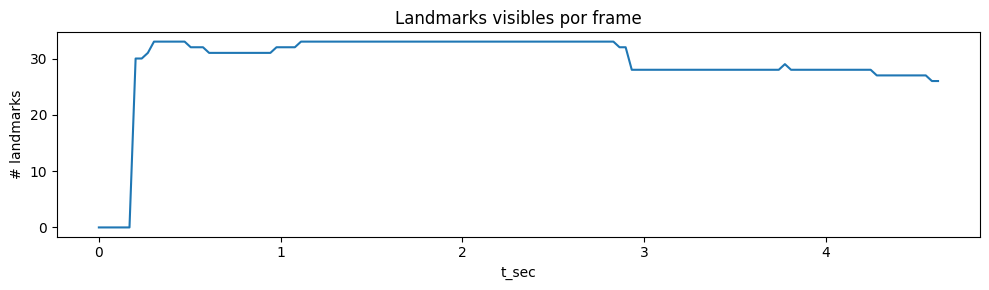

In [16]:
plt.figure(figsize=(10,3))
x = df["t_sec"] if "t_sec" in df.columns else df.index
plt.plot(x, df["visible_landmarks"])
plt.title("Landmarks visibles por frame")
plt.xlabel("t_sec" if "t_sec" in df.columns else "frame")
plt.ylabel("# landmarks")
plt.tight_layout()
plt.show()


### Utilidades geométricas

In [17]:
def mid_point(ax, ay, bx, by):
    return (ax+bx)/2.0, (ay+by)/2.0

def trunk_inclination(row):
    # usa hombros (11,12) y caderas (23,24)
    try:
        sx1, sy1 = row["x_11"], row["y_11"]
        sx2, sy2 = row["x_12"], row["y_12"]
        hx1, hy1 = row["x_23"], row["y_23"]
        hx2, hy2 = row["x_24"], row["y_24"]
    except KeyError:
        return np.nan

    if any(pd.isna([sx1,sy1,sx2,sy2,hx1,hy1,hx2,hy2])):
        return np.nan

    mx_s, my_s = mid_point(sx1, sy1, sx2, sy2)
    mx_h, my_h = mid_point(hx1, hy1, hx2, hy2)

    # vector cadera->hombro
    vx, vy = mx_s - mx_h, my_s - my_h
    # ángulo respecto a vertical (eje y). Ojo: y de imagen crece hacia abajo.
    # Usamos atan2(dx, dy) para medir inclinación lateral en grados.
    ang_deg = math.degrees(math.atan2(vx, vy))
    return ang_deg  # 0 ~ vertical; +/- indica inclinación lateral

def angle_3pts(ax, ay, bx, by, cx, cy):
    # ángulo ABC (en grados)
    v1 = np.array([ax-bx, ay-by], dtype=float)
    v2 = np.array([cx-bx, cy-by], dtype=float)
    if np.any(np.isnan([*v1, *v2])): return np.nan
    n1 = np.linalg.norm(v1)
    n2 = np.linalg.norm(v2)
    if n1==0 or n2==0: return np.nan
    cosang = np.clip(np.dot(v1, v2)/(n1*n2), -1.0, 1.0)
    return math.degrees(math.acos(cosang))

def knee_angle(row, side="left"):
    # left: (hip=23, knee=25, ankle=27) ; right: (24,26,28)
    if side=="left":
        ids = (23,25,27)
    else:
        ids = (24,26,28)
    ax, ay = row[f"x_{ids[0]}"], row[f"y_{ids[0]}"]
    bx, by = row[f"x_{ids[1]}"], row[f"y_{ids[1]}"]
    cx, cy = row[f"x_{ids[2]}"], row[f"y_{ids[2]}"]
    return angle_3pts(ax, ay, bx, by, cx, cy)


### Series de ángulos

In [18]:
df["trunk_deg"] = df.apply(trunk_inclination, axis=1)
df["knee_left_deg"]  = df.apply(lambda r: knee_angle(r, "left"), axis=1)
df["knee_right_deg"] = df.apply(lambda r: knee_angle(r, "right"), axis=1)

print(df[["trunk_deg","knee_left_deg","knee_right_deg"]].describe())


        trunk_deg  knee_left_deg  knee_right_deg
count  132.000000     132.000000      132.000000
mean   -47.280327     171.036674      170.299106
std    171.470277       7.198423       10.967091
min   -179.957209     153.646191      136.112101
25%   -177.545325     164.639835      165.991940
50%   -173.622069     172.255570      175.370945
75%    178.287722     177.993719      178.427950
max    179.961318     179.898054      179.964169


### Plots angulares

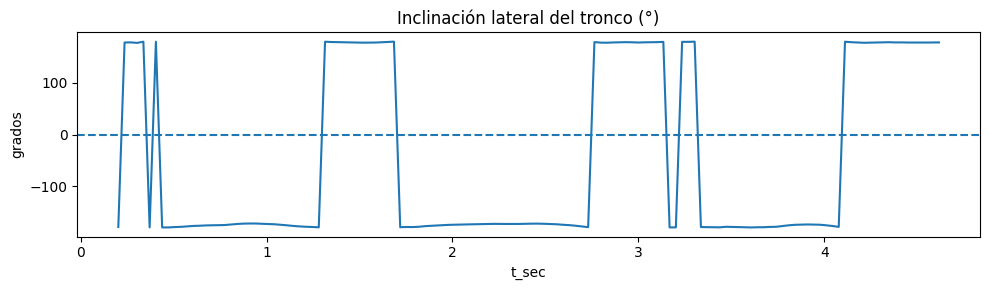

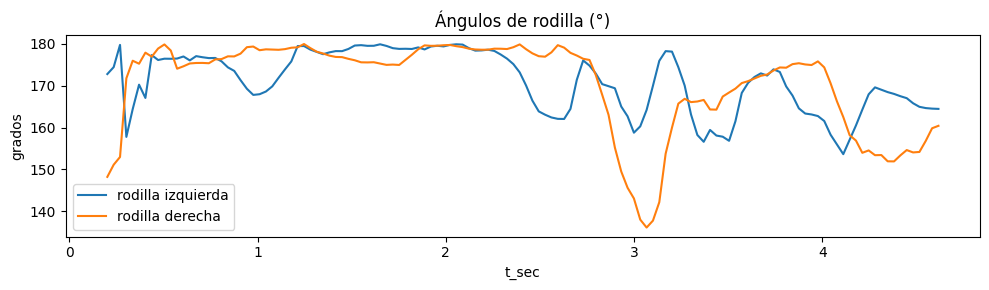

In [19]:
x = df["t_sec"] if "t_sec" in df.columns else df.index

plt.figure(figsize=(10,3))
plt.plot(x, df["trunk_deg"])
plt.axhline(0, linestyle="--")
plt.title("Inclinación lateral del tronco (°)")
plt.xlabel("t_sec" if "t_sec" in df.columns else "frame")
plt.ylabel("grados")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,3))
plt.plot(x, df["knee_left_deg"], label="rodilla izquierda")
plt.plot(x, df["knee_right_deg"], label="rodilla derecha")
plt.title("Ángulos de rodilla (°)")
plt.xlabel("t_sec" if "t_sec" in df.columns else "frame")
plt.ylabel("grados")
plt.legend()
plt.tight_layout()
plt.show()


### Velocidad aproximada

count    131.000000
mean       0.508330
std        0.482906
min        0.008215
25%        0.204439
50%        0.354184
75%        0.711249
max        3.298829
Name: speed_norm, dtype: float64


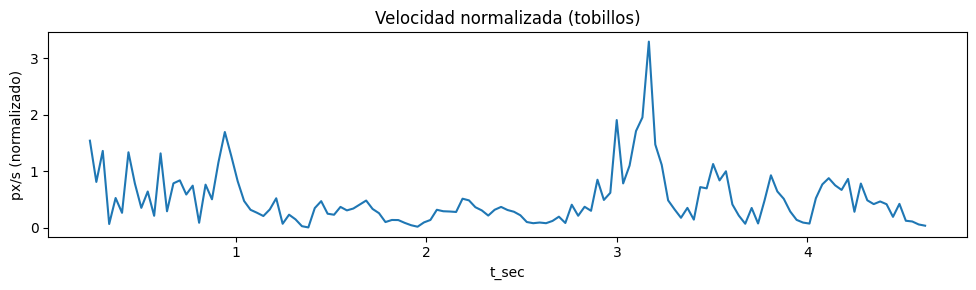

In [20]:
def norm_scale_row(row):
    # distancia vertical hombro-cadera (como escala)
    try:
        _, my_s = mid_point(row["x_11"], row["y_11"], row["x_12"], row["y_12"])
        _, my_h = mid_point(row["x_23"], row["y_23"], row["x_24"], row["y_24"])
    except KeyError:
        return np.nan
    if any(pd.isna([my_s, my_h])): return np.nan
    return abs(my_s - my_h)

# centro de tobillos como proxy de posición
cx = (df["x_27"] + df["x_28"]) / 2.0
cy = (df["y_27"] + df["y_28"]) / 2.0

scale = df.apply(norm_scale_row, axis=1)
dt = np.diff(df["t_sec"].values) if "t_sec" in df.columns else np.ones(len(df)-1)

vx = np.diff(cx) / np.where(dt==0, np.nan, dt)
vy = np.diff(cy) / np.where(dt==0, np.nan, dt)
speed = np.sqrt(vx**2 + vy**2) / scale.iloc[1:].values  # normalizada

df = df.copy()
df.loc[df.index[1:], "speed_norm"] = speed
print(df["speed_norm"].describe())

plt.figure(figsize=(10,3))
plt.plot(x, df["speed_norm"])
plt.title("Velocidad normalizada (tobillos)")
plt.xlabel("t_sec" if "t_sec" in df.columns else "frame")
plt.ylabel("px/s (normalizado)")
plt.tight_layout()
plt.show()


### Resumen por archivo/parquet

In [25]:
parquets = sorted(glob.glob(os.path.join(DRIVE_POSES, "*.parquet")))

def class_from_path(p):
    base = os.path.splitext(os.path.basename(p))[0]
    return base.lower().replace(" ", "_")

def summarize_parquet(p):
    d = pd.read_parquet(p)
    cols_x = [f"x_{i}" for i in range(LM)]
    cols_v = [f"vis_{i}" for i in range(LM) if f"vis_{i}" in d.columns]
    mask = ~d[cols_x].isna().all(axis=1)
    n_frames = len(d)
    with_pose = int(mask.sum())
    if len(cols_v)==LM:
        vis_count = (d[cols_v].fillna(0).values >= 0.5).sum(axis=1)
    else:
        vis_count = (~d[cols_x].isna()).sum(axis=1)
    d["visible_landmarks"] = vis_count
    # ángulos y velocidad (rápido, sin plots)
    d["trunk_deg"] = d.apply(trunk_inclination, axis=1)
    d["knee_left_deg"]  = d.apply(lambda r: knee_angle(r, "left"), axis=1)
    d["knee_right_deg"] = d.apply(lambda r: knee_angle(r, "right"), axis=1)
    # velocidad (versión simple sin normalizar si falta t_sec)
    if "t_sec" in d.columns:
        cx = (d["x_27"] + d["x_28"]) / 2.0
        cy = (d["y_27"] + d["y_28"]) / 2.0
        dt = np.diff(d["t_sec"].values)
        vx = np.diff(cx) / np.where(dt==0, np.nan, dt)
        vy = np.diff(cy) / np.where(dt==0, np.nan, dt)
        speed = np.sqrt(vx**2 + vy**2)
        d.loc[d.index[1:], "speed"] = speed

    return {
        "file": os.path.basename(p),
        "class": class_from_path(p),
        "frames": n_frames,
        "frames_with_pose": with_pose,
        "pose_ratio": with_pose/n_frames if n_frames else np.nan,
        "avg_visible_lm": float(np.nanmean(d["visible_landmarks"])),
        "mean_trunk_deg": float(np.nanmean(d["trunk_deg"])),
        "std_trunk_deg":  float(np.nanstd(d["trunk_deg"])),
        "mean_knee_L":    float(np.nanmean(d["knee_left_deg"])),
        "mean_knee_R":    float(np.nanmean(d["knee_right_deg"])),
        "mean_speed":     float(np.nanmean(d.get("speed", np.nan))),
    }

summ_rows = [summarize_parquet(p) for p in parquets]
summary_df = pd.DataFrame(summ_rows).sort_values(["class","file"])
display(summary_df)


,file,class,frames,frames_with_pose,pose_ratio,avg_visible_lm,mean_trunk_deg,std_trunk_deg,mean_knee_L,mean_knee_R,mean_speed
7,sit_front.parquet,sit_front,97,97,1.000000,32.092784,-42.514908,174.000057,157.542098,163.536101,39.486513
3,sit_front (1).parquet,sit_front_(1),79,79,1.000000,33.000000,-178.759732,0.885781,145.221011,138.328171,48.341628
2,sit_front (1) (1).parquet,sit_front_(1)_(1),97,97,1.000000,32.092784,-42.514908,174.000057,157.542098,163.536101,39.486513
5,sit_front (2).parquet,sit_front_(2),94,94,1.000000,33.000000,38.677061,173.393658,145.459030,150.219207,11.065429
4,sit_front (2) (1).parquet,sit_front_(2)_(1),79,79,1.000000,33.000000,-178.759732,0.885781,145.221011,138.328171,48.341628
6,sit_front (3).parquet,sit_front_(3),94,94,1.000000,33.000000,38.677061,173.393658,145.459030,150.219207,11.065429
13,sit_side.parquet,sit_side,84,84,1.000000,24.000000,28.952393,157.914299,123.477866,120.499889,35.688752
9,sit_side (1).parquet,sit_side_(1),65,65,1.000000,24.000000,91.631923,142.368049,112.502173,113.068041,215.801329
8,sit_side (1) (1).parquet,sit_side_(1)_(1),121,121,1.000000,26.000000,-39.230724,158.713045,102.096790,98.054284,42.610601
11,sit_side (2).parquet,sit_side_(2),121,121,1.000000,26.000000,-39.230724,158.713045,102.096790,98.054284,42.610601


### Agregación por clase

,class,frames,pose_ratio,avg_visible_lm,mean_trunk_deg,mean_knee_L,mean_knee_R,mean_speed
0,sit_front,97,1.000000,32.092784,-42.514908,157.542098,163.536101,39.486513
1,sit_front_(1),79,1.000000,33.000000,-178.759732,145.221011,138.328171,48.341628
2,sit_front_(1)_(1),97,1.000000,32.092784,-42.514908,157.542098,163.536101,39.486513
3,sit_front_(2),94,1.000000,33.000000,38.677061,145.459030,150.219207,11.065429
4,sit_front_(2)_(1),79,1.000000,33.000000,-178.759732,145.221011,138.328171,48.341628
5,sit_front_(3),94,1.000000,33.000000,38.677061,145.459030,150.219207,11.065429
6,sit_side,84,1.000000,24.000000,28.952393,123.477866,120.499889,35.688752
7,sit_side_(1),65,1.000000,24.000000,91.631923,112.502173,113.068041,215.801329
8,sit_side_(1)_(1),121,1.000000,26.000000,-39.230724,102.096790,98.054284,42.610601
9,sit_side_(2),121,1.000000,26.000000,-39.230724,102.096790,98.054284,42.610601


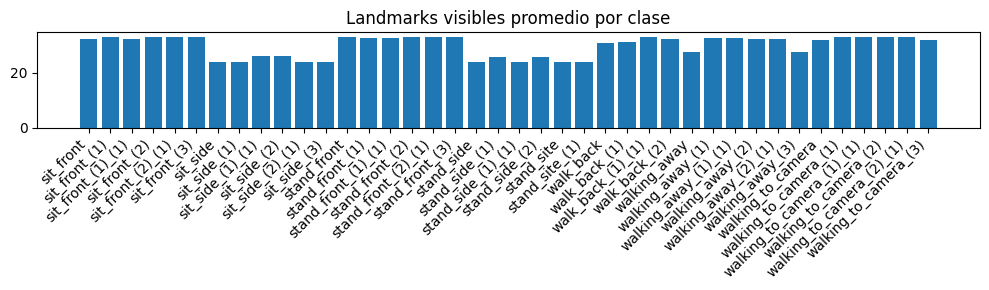

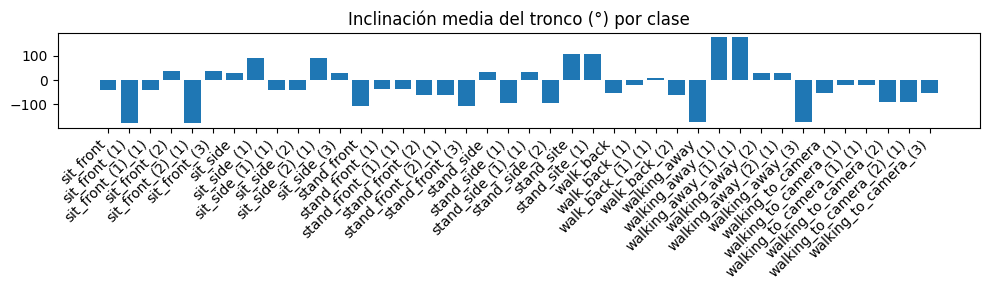

In [26]:
# Celda 9: agregación por clase
by_class = (summary_df
            .groupby("class")
            .agg(frames=("frames","sum"),
                 pose_ratio=("pose_ratio","mean"),
                 avg_visible_lm=("avg_visible_lm","mean"),
                 mean_trunk_deg=("mean_trunk_deg","mean"),
                 mean_knee_L=("mean_knee_L","mean"),
                 mean_knee_R=("mean_knee_R","mean"),
                 mean_speed=("mean_speed","mean"))
            .reset_index()
           )
display(by_class)

# barras rápidas
plt.figure(figsize=(10,3))
plt.bar(by_class["class"], by_class["avg_visible_lm"])
plt.title("Landmarks visibles promedio por clase")
plt.xticks(rotation=45, ha="right")
plt.tight_layout(); plt.show()

plt.figure(figsize=(10,3))
plt.bar(by_class["class"], by_class["mean_trunk_deg"])
plt.title("Inclinación media del tronco (°) por clase")
plt.xticks(rotation=45, ha="right")
plt.tight_layout(); plt.show()


### Matriz simple de características para un clasificador

In [27]:
# Celda 10: construir dataset de frames con features y clase
def frames_with_features(p):
    lab = class_from_path(p)
    d = pd.read_parquet(p)
    # visibles
    cols_v = [f"vis_{i}" for i in range(LM) if f"vis_{i}" in d.columns]
    if len(cols_v)==LM:
        vis_count = (d[cols_v].fillna(0).values >= 0.5).sum(axis=1)
    else:
        cols_x = [f"x_{i}" for i in range(LM)]
        vis_count = (~d[cols_x].isna()).sum(axis=1)
    d["visible_landmarks"] = vis_count
    # ángulos
    d["trunk_deg"] = d.apply(trunk_inclination, axis=1)
    d["knee_left_deg"]  = d.apply(lambda r: knee_angle(r, "left"), axis=1)
    d["knee_right_deg"] = d.apply(lambda r: knee_angle(r, "right"), axis=1)
    # velocidad
    if "t_sec" in d.columns:
        cx = (d["x_27"] + d["x_28"]) / 2.0
        cy = (d["y_27"] + d["y_28"]) / 2.0
        dt = np.diff(d["t_sec"].values)
        vx = np.diff(cx) / np.where(dt==0, np.nan, dt)
        vy = np.diff(cy) / np.where(dt==0, np.nan, dt)
        speed = np.sqrt(vx**2 + vy**2)
        d.loc[d.index[1:], "speed"] = speed
    d["class"] = lab
    return d[["visible_landmarks","trunk_deg","knee_left_deg","knee_right_deg","speed","class"]]

frames_df = pd.concat([frames_with_features(p) for p in parquets], ignore_index=True)
print(frames_df.shape)
display(frames_df.head())


(4440, 6)


,visible_landmarks,trunk_deg,knee_left_deg,knee_right_deg,speed,class
0,0,NaN,NaN,NaN,NaN,walk_back_(1)
1,0,NaN,NaN,NaN,NaN,walk_back_(1)
2,0,NaN,NaN,NaN,NaN,walk_back_(1)
3,0,NaN,NaN,NaN,NaN,walk_back_(1)
4,0,NaN,NaN,NaN,NaN,walk_back_(1)


In [32]:
# Celda 11: baseline rápido
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Para evitar fuga por frames del mismo video, dividimos por archivo usando summary_df
train_files, test_files = train_test_split(summary_df["file"], test_size=0.3, random_state=42, stratify=summary_df["class"])

def frames_from_files(files):
    X_list, y_list = [], []
    for f in files:
        p = os.path.join(DRIVE_POSES, f)
        d = frames_with_features(p)
        d = d.dropna()
        X = d[["visible_landmarks","trunk_deg","knee_left_deg","knee_right_deg","speed"]].values
        y = d["class"].values
        X_list.append(X); y_list.append(y)
    return (np.vstack(X_list), np.concatenate(y_list)) if X_list else (np.empty((0,5)), np.empty((0,)))

X_train, y_train = frames_from_files(train_files)
X_test,  y_test  = frames_from_files(test_files)

print("Train frames:", X_train.shape[0], "Test frames:", X_test.shape[0])

clf = make_pipeline(StandardScaler(with_mean=False), SVC(kernel="rbf", C=3, gamma="scale"))
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
print("Confusion matrix:\n", confusion_matrix(y_test, pred))


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.